# Table of Contents

1. [Model Building](#mbuild)
2. [Pretrained Model Weights Loading](#mload)
3. [Model Prediction](#mpredict)


In [2]:
#Imports the print function from newer versions of python
from __future__ import print_function

%tensorflow_version 1.x
%matplotlib inline

TensorFlow 1.x selected.


In [3]:
!git clone https://github.com/zeeshanalipnhwr/Semantic-Segmentation-Keras
!mv Semantic-Segmentation-Keras Semantic_Segmentation_Keras

Cloning into 'Semantic-Segmentation-Keras'...
remote: Enumerating objects: 219, done.
remote: Counting objects: 100% (219/219), done.
remote: Compressing objects: 100% (207/207), done.
remote: Total 411 (delta 109), reused 0 (delta 0), pack-reused 192
Receiving objects: 100% (411/411), 21.75 MiB | 2.93 MiB/s, done.
Resolving deltas: 100% (195/195), done.


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Model Building<a id='mbuild'><\a>

![SegNet Architecture](https://www.researchgate.net/profile/Vijay_Badrinarayanan/publication/283471087/figure/fig1/AS:391733042008065@1470407843299/An-illustration-of-the-SegNet-architecture-There-are-no-fully-connected-layers-and-hence.png)

In [0]:
from Semantic_Segmentation_Keras.Models import SegNet
from Semantic_Segmentation_Keras.Configs import SegNet_Configs

model = SegNet.SegNet(depth=SegNet_Configs.DEPTH).SegNet(input_shape=(SegNet_Configs.RESHAPE[0],
                                                                      SegNet_Configs.RESHAPE[1], 3))
model.summary()

# Pretrained Model Weights Loading<a id='mload'><\a>

In [0]:
model.load_weights("drive/My Drive/segnet_basic_72_f1.model")

# Model Predictions

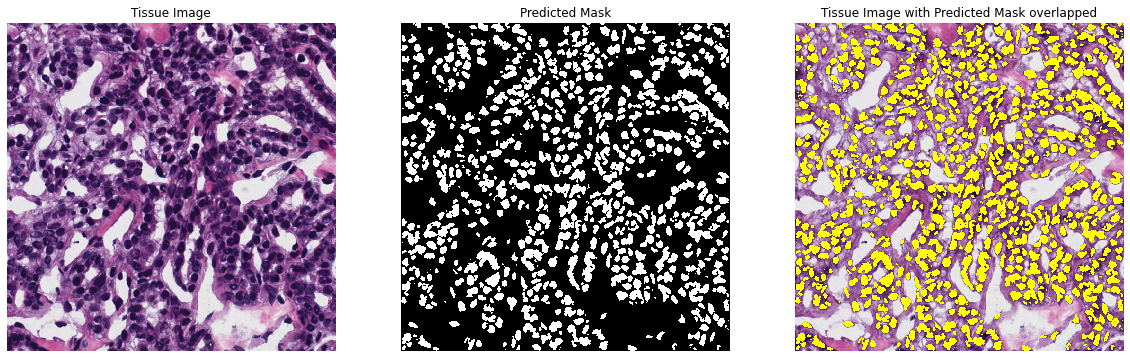

In [74]:
from Semantic_Segmentation_Keras.Utils import display, load_data
import numpy as np
import cv2

# load a sample image
image_path = "drive/My Drive/sample_tissue_image.tif"
sample_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
sample_image = cv2.resize(sample_image, SegNet_Configs.RESHAPE)
sample_image = np.array(sample_image, dtype="float") / 255.0
sample_image = np.expand_dims(sample_image, axis=0)

# make prediction for a sample on the network
prediction = model.predict(sample_image)
prediction = prediction.round(0)

# display the sample image along with its predicted mask
display.display_masked(sample_image[0], prediction[0], "Tissue Image", "Predicted Mask")